<a href="https://colab.research.google.com/github/Ishu2412/Quality-Sleep-Prediction-Model/blob/main/SleepQualityCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from catboost import CatBoostRegressor
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/sleep.csv/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df.shape

(374, 13)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df = df.drop_duplicates()
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df = df.drop(columns = ["Person ID", "Stress Level", "Blood Pressure"])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,Overweight,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea


In [ ]:
df = df.dropna()
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,Overweight,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea


In [ ]:
df.isnull().mean()*100

Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
BMI Category               0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,Overweight,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,Overweight,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   BMI Category             374 non-null    object 
 7   Heart Rate               374 non-null    int64  
 8   Daily Steps              374 non-null    int64  
 9   Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 32.1+ KB


['Age' 'Sleep Duration' 'Quality of Sleep' 'Physical Activity Level'
 'Heart Rate' 'Daily Steps' 'Gender' 'Occupation' 'BMI Category'
 'Sleep Disorder']


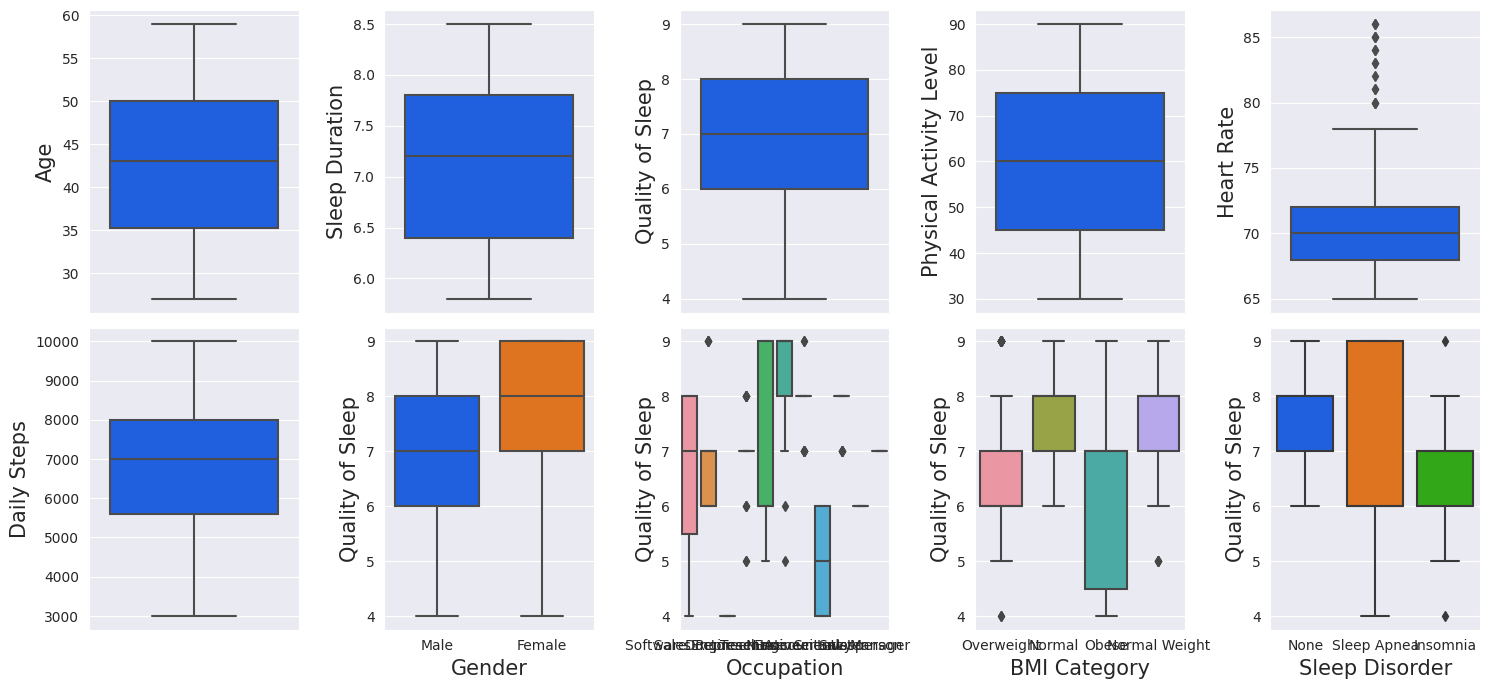

In [ ]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  df.select_dtypes(include='object').columns.values])
print(OrderedCols)

fig, ax = plt.subplots(2, 5, figsize=(15,7))

for i,col in enumerate(OrderedCols):
    x = i//5
    y = i%5
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[0,y])
        ax[0,y].yaxis.label.set_size(15)
    elif i == 5:
        sns.boxplot(data=df, y=col, ax=ax[1,y])
        ax[1,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Quality of Sleep', ax=ax[1,y])
        ax[1,y].xaxis.label.set_size(15)
        ax[1,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

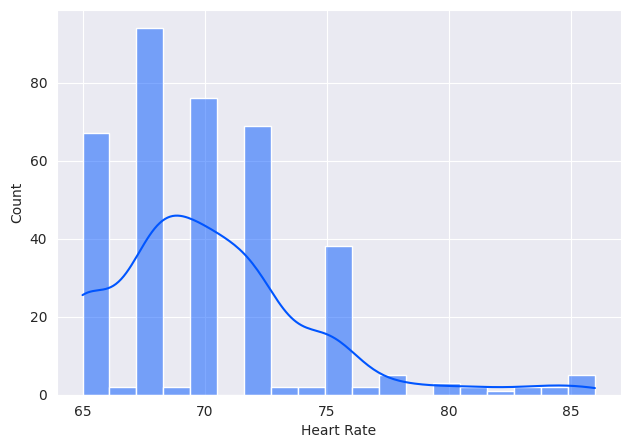

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Heart Rate'], kde = True)

plt.show()

In [ ]:
df['Heart Rate'].skew()

1.2248235470533522

In [ ]:
df['Heart Rate'].describe()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

<Axes: >

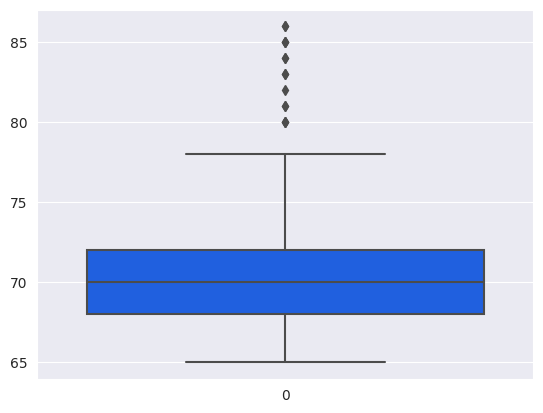

In [ ]:
sns.boxplot(df['Heart Rate'])

In [ ]:
percentile25 = df['Heart Rate'].quantile(0.25)
percentile75 = df['Heart Rate'].quantile(0.75)
print(percentile25, percentile75)

68.0 72.0


In [ ]:
iqr = percentile75 - percentile25
print(iqr)

4.0


In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Upper limit: ', upper_limit)
print('Lower limit: ', lower_limit)

Upper limit:  78.0
Lower limit:  62.0


In [ ]:
df[df['Heart Rate'] > upper_limit]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
3,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,Obese,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,Obese,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,Obese,82,3500,Insomnia
16,Female,29,Nurse,6.5,5,40,Normal Weight,80,4000,Sleep Apnea
18,Female,29,Nurse,6.5,5,40,Normal Weight,80,4000,Insomnia
80,Female,34,Scientist,5.8,4,32,Overweight,81,5200,Sleep Apnea
81,Female,34,Scientist,5.8,4,32,Overweight,81,5200,Sleep Apnea
93,Male,35,Lawyer,7.4,7,60,Obese,84,3300,Sleep Apnea
145,Female,38,Lawyer,7.4,7,60,Obese,84,3300,Sleep Apnea


In [ ]:
df[df['Heart Rate'] < lower_limit]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder


In [ ]:
df['Heart Rate'] = np.where(df['Heart Rate'] > upper_limit, upper_limit, df['Heart Rate'])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,Overweight,77.0,4200,None
1,Male,28,Doctor,6.2,6,60,Normal,75.0,10000,None
2,Male,28,Doctor,6.2,6,60,Normal,75.0,10000,None
3,Male,28,Sales Representative,5.9,4,30,Obese,78.0,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,Obese,78.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,Overweight,68.0,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,Overweight,68.0,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,Overweight,68.0,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,Overweight,68.0,7000,Sleep Apnea


<Axes: >

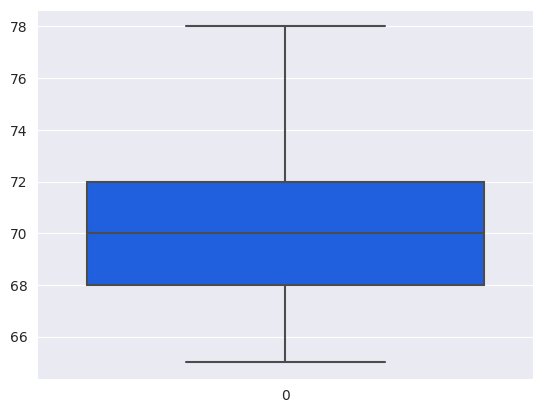

In [ ]:
sns.boxplot(df['Heart Rate'])

In [ ]:
df1 = df.copy()
df1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,Overweight,77.0,4200,None
1,Male,28,Doctor,6.2,6,60,Normal,75.0,10000,None
2,Male,28,Doctor,6.2,6,60,Normal,75.0,10000,None
3,Male,28,Sales Representative,5.9,4,30,Obese,78.0,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,Obese,78.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,Overweight,68.0,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,Overweight,68.0,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,Overweight,68.0,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,Overweight,68.0,7000,Sleep Apnea


In [ ]:
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
df1

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,77.0,4200,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,28,6.2,6,60,75.0,10000,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28,6.2,6,60,75.0,10000,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28,5.9,4,30,78.0,3000,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,28,5.9,4,30,78.0,3000,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,68.0,7000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
370,59,8.0,9,75,68.0,7000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
371,59,8.1,9,75,68.0,7000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
372,59,8.1,9,75,68.0,7000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


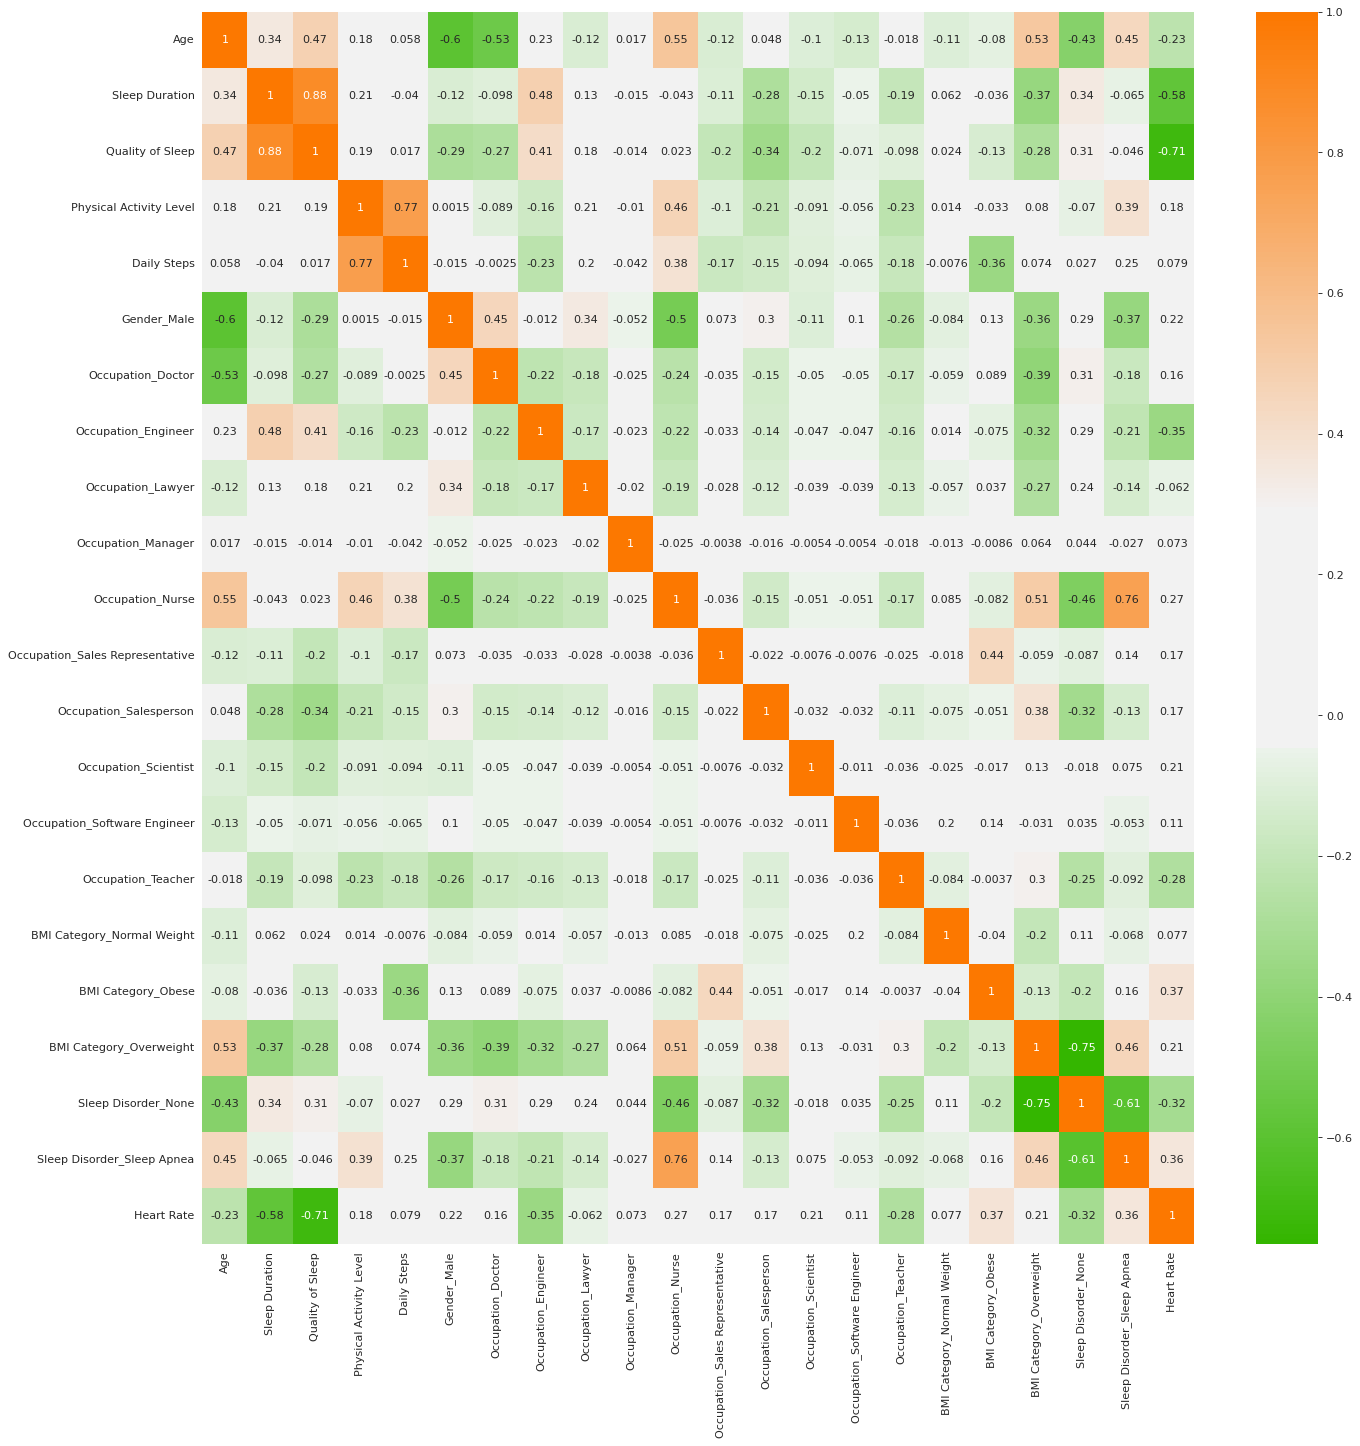

In [ ]:
target = 'Heart Rate'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 20), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
Y = df.pop("Quality of Sleep")
X = df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(299, 9) (299,)
(75, 9) (75,)


In [ ]:
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)

Names of categorical columns :  ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


In [ ]:
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Location of categorical columns :  [0, 2, 5, 8]


In [ ]:
from catboost import Pool
train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [ ]:
model = CatBoostRegressor(loss_function = "RMSE")

In [ ]:
model.fit(train_data, eval_set = test_data, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.042129
0:	learn: 1.1450771	test: 1.2156507	best: 1.2156507 (0)	total: 47.3ms	remaining: 47.3s
1:	learn: 1.1066371	test: 1.1745451	best: 1.1745451 (1)	total: 52.4ms	remaining: 26.2s
2:	learn: 1.0717246	test: 1.1380961	best: 1.1380961 (2)	total: 57.6ms	remaining: 19.1s
3:	learn: 1.0377917	test: 1.1030156	best: 1.1030156 (3)	total: 63.1ms	remaining: 15.7s
4:	learn: 1.0020241	test: 1.0667418	best: 1.0667418 (4)	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9705179	test: 1.0352673	best: 1.0352673 (5)	total: 73.7ms	remaining: 12.2s
6:	learn: 0.9435643	test: 1.0062026	best: 1.0062026 (6)	total: 76.4ms	remaining: 10.8s
7:	learn: 0.9139778	test: 0.9761765	best: 0.9761765 (7)	total: 80.8ms	remaining: 10s
8:	learn: 0.8865387	test: 0.9467345	best: 0.9467345 (8)	total: 87ms	remaining: 9.58s
9:	learn: 0.8602787	test: 0.9210536	best: 0.9210536 (9)	total: 99.8ms	remaining: 9.88s
10:	learn: 0.8339282	test: 0.8955303	best: 0.8955303 (10)	total: 106ms	remaining: 9.5s
11:	learn: 0.8089

In [ ]:
model.save_model('sleepquality.cbm')

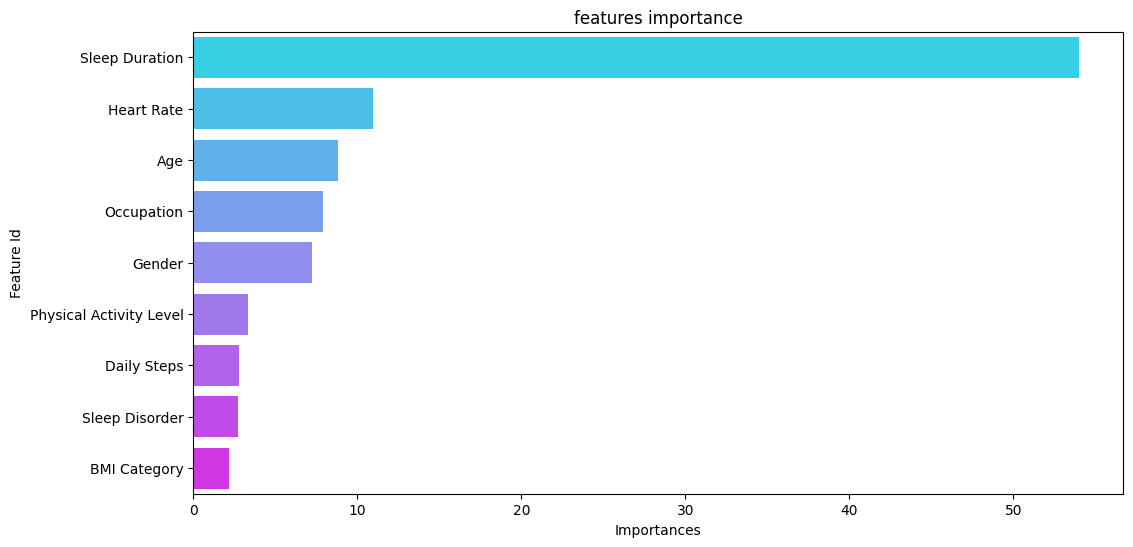

In [ ]:
df_feature_importance = pd.DataFrame(model.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [ ]:
y_predict= model.predict(X_test)

Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))

r2_test = r2_score(y_test,y_predict)

n= X_train.shape[0]
p= X_train.shape[1]
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 0.14
R2: 0.99
Adjusted R2: 0.99
